# Exploring each type of feature
- <a href='#sec1'><b>Binary Features</b></a>
- <a href='#sec2'><b>Categorical Features</b></a>
- <a href='#sec3'><b>Continuous or ordinal features</b></a>

- Data Explanation from Kaggle<br>
In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', header=0)

In [3]:
all_fs = train.columns[2:]
binary_fs = sorted([f for f in all_fs if '_bin' in f])
categorical_fs = sorted([f for f in all_fs if '_cat' in f])
other_fs = sorted([f for f in all_fs
            if f not in binary_fs
            if f not in categorical_fs])

In [4]:
print("# total of features: %8d" % len(all_fs))
print("# of binary features: %7d" % len(binary_fs))
print("# of categorical features: %1d" % len(categorical_fs))
print("# of other features: %8d" % len(other_fs))

# total of features:       57
# of binary features:      17
# of categorical features: 14
# of other features:       26


<a id='sec1'></a>
# Binary Features

In [5]:
binaries = train[binary_fs]
binary_fs

['ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin']

<b>There are two kinds of binary features. One comes with 'calc' label and the other with 'ind' label.</b>

<b>Examine the frequency of positive class (i.e. 1) for each feature. Then create a contingency table to see how they separate with the target class</b>

In [6]:
def create_contingency_table(x, y, output=True, percent=False, printout=False):
    #if (x.shape[0] != 1) or (x.shape[0] != 1):
    #    print('Error: inputs must be column vectors')
    if len(x) != len(y):
        print('Error: inputs must be of the same length')
    total = len(x)
    
    xy = pd.DataFrame()
    xy['x'] = x
    xy['y'] = y
    
    zeroF_zeroT = len(xy[(xy.x == 0) & (xy.y == 0)])
    zeroF_oneT = len(xy[(xy.x == 0) & (xy.y == 1)])
    oneF_zeroT = len(xy[(xy.x == 1) & (xy.y == 0)])
    oneF_oneT = len(xy[(xy.x == 1) & (xy.y == 1)])
    unknown = total - (zeroF_zeroT + zeroF_oneT + oneF_zeroT + oneF_oneT)
    
    f0_frequency = zeroF_zeroT + zeroF_oneT
    f1_frequency = oneF_zeroT + oneF_oneT
    contingency = np.array([zeroF_zeroT, zeroF_oneT, oneF_zeroT, oneF_oneT, unknown])
                   
    if percent:
        f0_frequency = 100*(f0_frequency/total)
        f1_frequency = 100*(f1_frequency/total)
        contingency = 100*(contingency/total)
        total = 1
        
    if printout:
        if percent:
            print('Feature Distribution: f0=%3.1f%% f1=%3.1f%%' % (f0_frequency, f1_frequency))
            print('feature=0, class=0: %4.1f%%' % (contingency[0]))
            print('feature=0, class=1: %4.1f%%' % (contingency[1]))
            print('feature=1, class=0: %4.1f%%' % (contingency[2]))
            print('feature=1, class=1: %4.1f%%' % (contingency[3]))
            print('Unknown Data      : %4.1f' % (contingency[4]))
            
        else:
            print('Feature Distribution: f0=%7d f1=%7d' % (f0_frequency, f1_frequency))
            print('feature=0, class=0: %7d /%7d' % (contingency[0], total))
            print('feature=0, class=1: %7d /%7d' % (contingency[1], total))
            print('feature=1, class=0: %7d /%7d' % (contingency[2], total))
            print('feature=1, class=1: %7d /%7d' % (contingency[3], total))
            print('Uknown Data       : %7d /%7d' % (contingency[4], total))   

    if output:
        return contingency
    else:
        return

In [7]:
def calculate_conditional_prob_bin(contingency, output=True, printout=False):
    prob_class1_cond_feature0 = contingency[1]/np.sum(contingency[:2])
    prob_class1_cond_feature1 = contingency[3]/np.sum(contingency[2:])
    if printout:
        print('p(class=1|feature=0)=%.4f' % prob_class1_cond_feature0)
        print('p(class=1|feature=1)=%.4f' % prob_class1_cond_feature1)
    if output:
        return np.array([prob_class1_cond_feature0, prob_class1_cond_feature1])
    else:
        return

In [8]:
y = train.target
predictive_ratios = []
for i in range(len(binary_fs)):
    fs = binary_fs[i]
    x = binaries[fs]
    print('==== %s ====' % fs)
    contingency = create_contingency_table(x,y, output=True, printout=True, percent=True)
    prob = calculate_conditional_prob_bin(contingency, output=True, printout=True)
    predictive_ratios.append(prob[1]/prob[0])

==== ps_calc_15_bin ====
Feature Distribution: f0=87.8% f1=12.2%
feature=0, class=0: 84.6%
feature=0, class=1:  3.2%
feature=1, class=0: 11.8%
feature=1, class=1:  0.4%
Unknown Data      :  0.0
p(class=1|feature=0)=0.0365
p(class=1|feature=1)=0.0362
==== ps_calc_16_bin ====
Feature Distribution: f0=37.2% f1=62.8%
feature=0, class=0: 35.9%
feature=0, class=1:  1.4%
feature=1, class=0: 60.5%
feature=1, class=1:  2.3%
Unknown Data      :  0.0
p(class=1|feature=0)=0.0363
p(class=1|feature=1)=0.0365
==== ps_calc_17_bin ====
Feature Distribution: f0=44.6% f1=55.4%
feature=0, class=0: 43.0%
feature=0, class=1:  1.6%
feature=1, class=0: 53.4%
feature=1, class=1:  2.0%
Unknown Data      :  0.0
p(class=1|feature=0)=0.0365
p(class=1|feature=1)=0.0364
==== ps_calc_18_bin ====
Feature Distribution: f0=71.3% f1=28.7%
feature=0, class=0: 68.7%
feature=0, class=1:  2.6%
feature=1, class=0: 27.7%
feature=1, class=1:  1.1%
Unknown Data      :  0.0
p(class=1|feature=0)=0.0364
p(class=1|feature=1)=0.0366


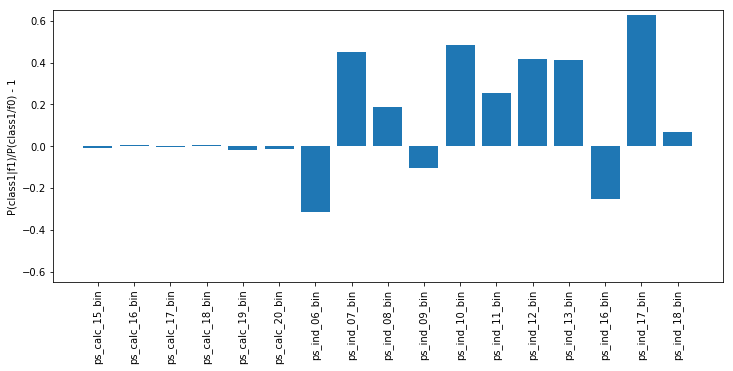

In [9]:
prob_differential = np.array(predictive_ratios) - 1

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.bar(binary_fs, prob_differential)
ax.set_ylabel('P(class1|f1)/P(class1/f0) - 1')
ax.set_ylim([-0.65, 0.65])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

<b>It appears that the 'ind' binary features are more useful in discriminating the two classes than the 'calc' ones. Correlation/co-segregation with other features of the similar kind (e.g. 'ind') to be investigated later</b>

<a id='sec2'></a>
# Categorical Features

In [10]:
categoricals = train[categorical_fs]
categorical_fs

['ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat']

<b>There are two kinds of categorical features. One has label 'car' and the other 'ind'</b>

<b>Check what and how many categories there are for each feature</b>

In [12]:
for feature in categorical_fs:
    categories = sorted(categoricals[feature].unique())
    if -1 in categories:
        num_categories = len(categories) - 1
        print('%s: %d categories with missing values' % (feature, num_categories))
    else:
        num_categories = len(categories)
        print('%s: %d categories' % (feature, num_categories))
    print(categories)

ps_car_01_cat: 12 categories with missing values
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ps_car_02_cat: 2 categories with missing values
[-1, 0, 1]
ps_car_03_cat: 2 categories with missing values
[-1, 0, 1]
ps_car_04_cat: 10 categories
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ps_car_05_cat: 2 categories with missing values
[-1, 0, 1]
ps_car_06_cat: 18 categories
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
ps_car_07_cat: 2 categories with missing values
[-1, 0, 1]
ps_car_08_cat: 2 categories
[0, 1]
ps_car_09_cat: 5 categories with missing values
[-1, 0, 1, 2, 3, 4]
ps_car_10_cat: 3 categories
[0, 1, 2]
ps_car_11_cat: 104 categories
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9

In [52]:
def encore_my_categorical_labels(categorical_feature_vector):
    '''
    Custome version of categorical label encoding. Takes a pd.Series of 
    a categorical feature. Creates a new DataFrame whose columnes 
    designate each category (including missing value) in the Series. 
    For each category, inser 1 if the sample is of that category, 
    otherwise insert 0.
    '''
    encoded = pd.DataFrame()
    feature = categorical_feature_vector.name
    categories = sorted(categorical_feature_vector.unique())
    for cat in categories:
        if cat == -1:
            cat_name = feature + '_NaN'
        else:
            cat_name = feature + '_' + str(cat)
        encoded[cat_name] = (categorical_feature_vector == cat).astype('int')
    return encoded

In [64]:
def calculate_conditional_prob_cat(categorical_feature_vector, target_vector, 
                                   output=True, printout=False):
    '''
    Custom encodes the categorical feature column (see encore_my_categorical_labels() method).
    Then for each encoded category, calculte the conditional probability of sample being in
    class1 (class information is stored in target_vector input. Therefore, the two input
    vectors must be of the same length and aligned) given the category
    (i.e p(class=1|category)). Output and printout options are there as output options.
    The output is returned as DataFrame
    '''
    # Create a list to store cond. probs
    conditional_probs = {}
    
    # Custome encode the feature column (pd.Series)
    encoded = encore_my_categorical_labels(categorical_feature_vector)
    
    # Calculate conditional probability of being in classes 0 and 1 give category
    for category in encoded.columns:
        cat_total = np.sum(encoded[category])
        class0 = np.sum(encoded[category][target_vector == 0])
        class1 = np.sum(encoded[category][target_vector == 1])
        
        cond_prob0 = class0 / cat_total
        cond_prob1 = class1 / cat_total
        probs = np.array([cond_prob0, cond_prob1])
        
        conditional_probs[category] = probs
        result = pd.DataFrame(conditional_probs).T
        result = result.rename(columns={0: 'p(class0|category)', 1: 'p(class1|category)'})
        
        if printout:
            #print('p(class=0|%s)=%.4f' % (category, probs[0]))
            print('p(class=1|%s)=%.4f' % (category, probs[1]))
    
    if output:
        return result
    else:
        return

<b>The first function above creates a column for each of the category for a single feature and convert into n_categories binary features. Second function use the output of the first function and calcualtes the conditional probability of being in class1 (or class0) given the category (i.e. 1 is entered for that sample for that now binary category)</b>

In [65]:
y = train.target
conditional_probs = pd.DataFrame()
for feature in categorical_fs:
    data = categoricals[feature]
    result = calculate_conditional_prob_cat(data, y)
    conditional_probs = pd.concat([conditional_probs, result], axis=0)

In [66]:
conditional_probs

,p(class0|category),p(class1|category)
ps_car_01_cat_0,0.956131,0.043869
ps_car_01_cat_1,0.953182,0.046818
ps_car_01_cat_10,0.963024,0.036976
ps_car_01_cat_11,0.958419,0.041581
ps_car_01_cat_2,0.957090,0.042910
ps_car_01_cat_3,0.962451,0.037549
ps_car_01_cat_4,0.960839,0.039161
ps_car_01_cat_5,0.960754,0.039246
ps_car_01_cat_6,0.970237,0.029763
ps_car_01_cat_7,0.971230,0.028770


In [72]:
# Examine only the entries for non-NaN categories
non_NaN_inds = [ind for ind in conditional_probs.index if 'NaN' not in ind]

In [77]:
conditional_probs.loc[non_NaN_inds, :].describe(percentiles=[0.5])

,p(class0|category),p(class1|category)
count,175.000000,175.000000
mean,0.958680,0.041320
std,0.012083,0.012083
min,0.906475,0.018423
50%,0.961276,0.038724
max,0.981577,0.093525


<b>So even the best category of a feature yields class 1 label only ~10% of the time</b>

<b>Now compare the 'car' and 'ind' features</b>

<a id='sec3'></a>
# Other Features